# This script contains the following:

### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data Preprocessing
### 4. The elbow technique
### 5. k-means clustering
### 6. Results

## 1. Importing libraries and data

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl 

In [139]:
# This option ensures the graphs we create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [140]:
path = r'C:\Users\nang6\OneDrive\Bureau\Data Analytics\Data Immersion\Achievement 6'

In [141]:
df = pd.read_csv(os.path.join(path,'Open Data Source', 'Cleaned Data', 'WHR (2008-2022)_checked_2.csv'))

## 2. Data cleaning

In [142]:
df.shape

(2199, 14)

In [143]:
df.head()

,Unnamed: 0,Country,Region,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Charity,Corruption Perception,Positive Emotions,Negative Emotions,Happiness Score Category
0,0,Afghanistan,Southern Asia,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,Low score
1,1,Afghanistan,Southern Asia,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,Middle score
2,2,Afghanistan,Southern Asia,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,Middle score
3,3,Afghanistan,Southern Asia,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,Low score
4,4,Afghanistan,Southern Asia,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,Low score


In [144]:
# Drop Unnamed column

df = df.drop(columns = ['Unnamed: 0'])

In [145]:
# Check for missing values

df.isnull().sum()

Country                       0
Region                        0
Year                          0
Happiness Score               0
GDP per Capita               20
Social Support               13
Life Expectancy              54
Freedom                      33
Charity                      73
Corruption Perception       116
Positive Emotions            24
Negative Emotions            16
Happiness Score Category      0
dtype: int64

In [146]:
# Drop all missing values

df = df.dropna(subset=['GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom','Charity','Corruption Perception', 'Positive Emotions','Negative Emotions'])

In [147]:
df.shape

(1958, 13)

In [148]:
# Check for duplicates

dups = df.duplicated()

In [149]:
dups.shape # No dups

(1958,)

In [150]:
df.dtypes

Country                      object
Region                       object
Year                          int64
Happiness Score             float64
GDP per Capita              float64
Social Support              float64
Life Expectancy             float64
Freedom                     float64
Charity                     float64
Corruption Perception       float64
Positive Emotions           float64
Negative Emotions           float64
Happiness Score Category     object
dtype: object

## 3. Data preprocessing

#### Drop categorical columns

In [151]:
df.drop(['Country','Year', 'Region', 'Happiness Score Category'], axis=1, inplace=True)

In [152]:
df.head()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Charity,Corruption Perception,Positive Emotions,Negative Emotions
0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


## 4. The elbow technique

In [153]:
# Defines the range of potential Clusters in the data. 

num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [154]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-103180.07648002401,
 -32490.56305919457,
 -19369.512419932278,
 -13221.552265750164,
 -9644.718988932078,
 -7039.930809475618,
 -5743.393293083177,
 -4766.885378370106,
 -4171.431565015283]

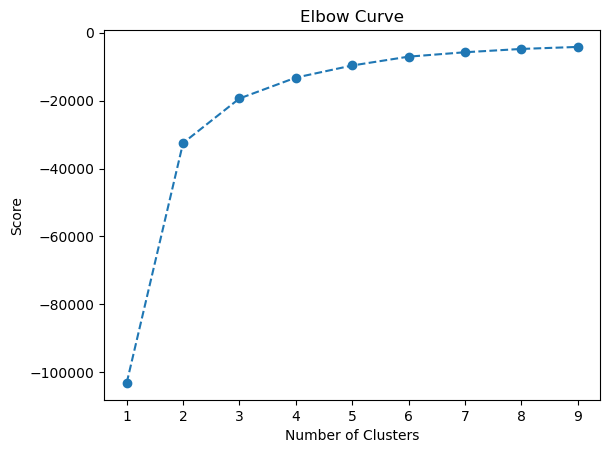

In [155]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score,marker = 'o', linestyle = '--')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Observation: 
There's a jump from two to three on the x-axis, but after that the curve becomes smoother. This means that the optimal count for the clusters is three.

## 5. k-means clustering

In [156]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [157]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3)

In [158]:
df['Clusters'] = kmeans.fit_predict(df)

C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nang6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [159]:
df.head()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Charity,Corruption Perception,Positive Emotions,Negative Emotions,Clusters
0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,2
1,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,2
2,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,2
3,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,2
4,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,2


In [160]:
df['Clusters'].value_counts()

0    766
1    730
2    462
Name: Clusters, dtype: int64

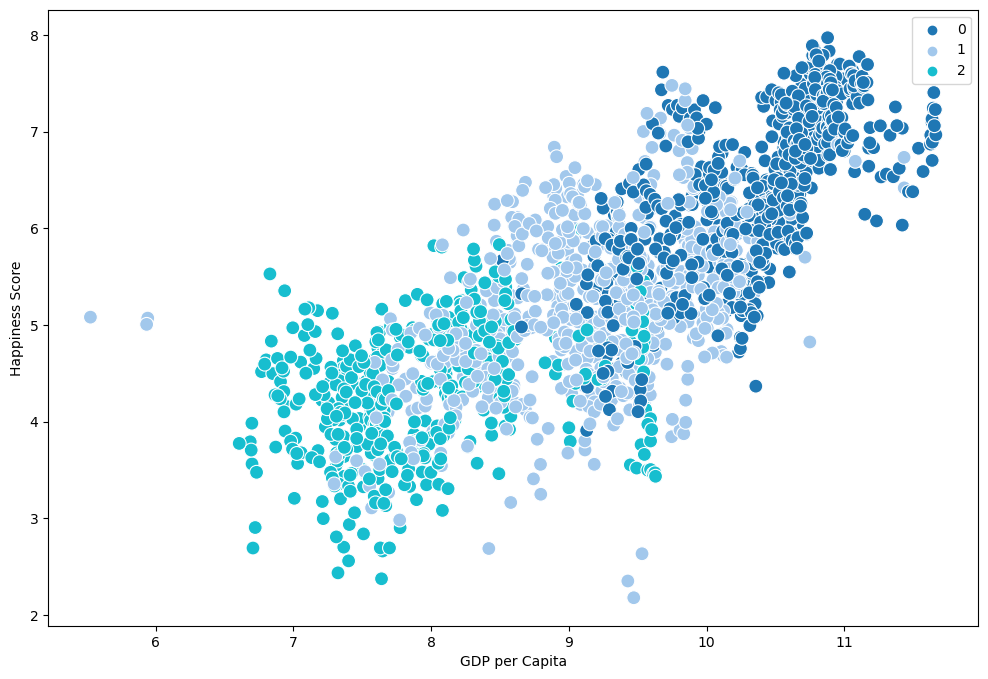

In [167]:
# Plot the Clusters for the 'Happiness Score' and 'GDP per Capita' variables.

# Define custom color palette

custom_palette = ['#1f77b4','#a2c8ec','#17becf']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP per Capita'], y=df['Happiness Score'], hue=kmeans.labels_, s=100, palette=custom_palette) 
ax.grid(False) 
plt.xlabel('GDP per Capita') 
plt.ylabel('Happiness Score') 
plt.show()

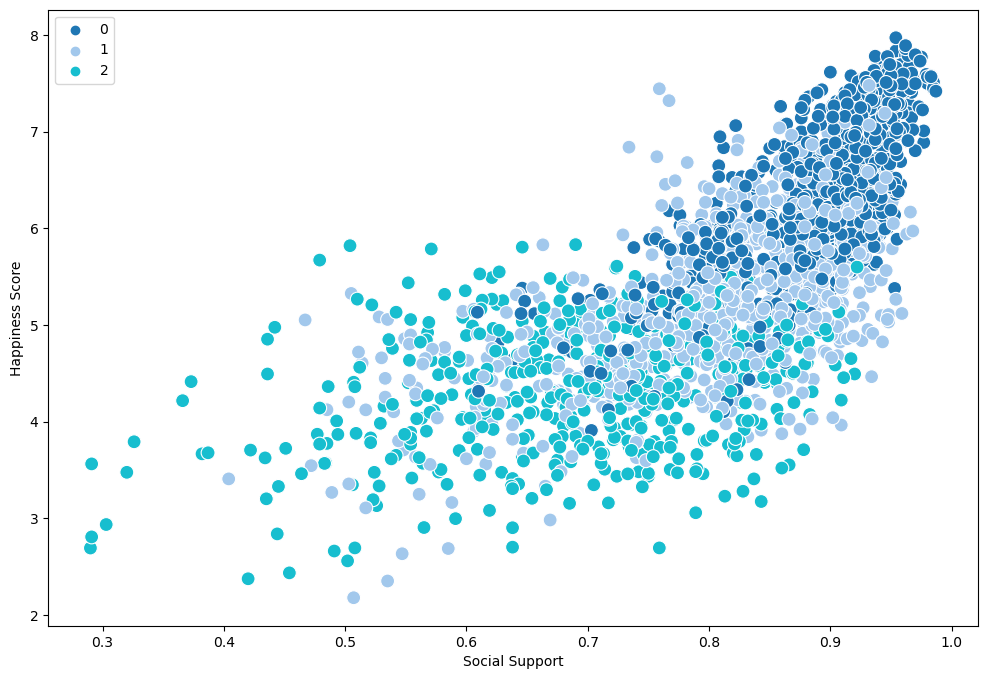

In [168]:
# Plot the Clusters for the 'Happiness Score' and 'Social Support' variables.

# Define custom color palette

custom_palette = ['#1f77b4','#a2c8ec','#17becf']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social Support'], y=df['Happiness Score'], hue=kmeans.labels_, s=100, palette=custom_palette) 
ax.grid(False) 
plt.xlabel('Social Support') 
plt.ylabel('Happiness Score') 
plt.show()

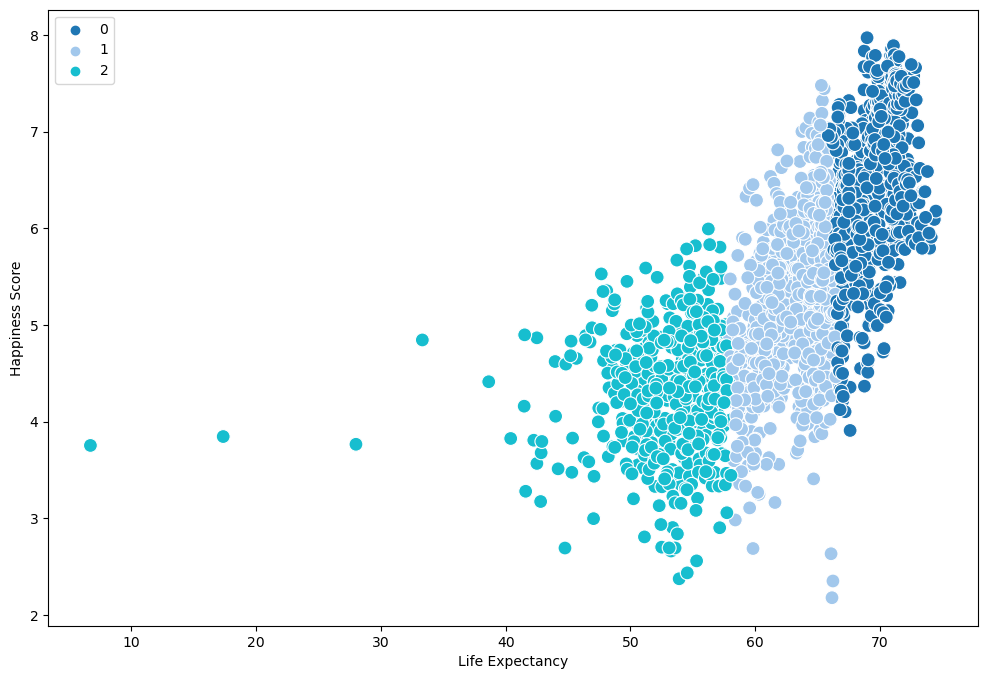

In [170]:
# Plot the Clusters for the 'Happiness Score' and 'Life Expectancy' variables.

# Define custom color palette

custom_palette = ['#1f77b4','#a2c8ec','#17becf']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life Expectancy'], y=df['Happiness Score'], hue=kmeans.labels_, s=100, palette=custom_palette) 
ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Happiness Score') 
plt.show()

In [171]:
df.loc[df['Clusters'] == 2, 'Cluster'] = 'turquoise'
df.loc[df['Clusters'] == 1, 'Cluster'] = 'light blue'
df.loc[df['Clusters'] == 0, 'Cluster'] = 'dark blue'

In [172]:
# Descriptive statistics

df.groupby('Cluster').agg({'Happiness Score':['mean', 'median'], 
                         'GDP per Capita':['mean', 'median'],
                        'Social Support':['mean', 'median'],            
                        'Life Expectancy':['mean', 'median']})

Happiness Score         GDP per Capita          Social Support  \
                      mean  median           mean   median           mean   
Cluster                                                                     
dark blue         6.409234  6.4440      10.364747  10.4930       0.888384   
light blue        5.195651  5.1665       9.158815   9.2280       0.797656   
turquoise         4.298188  4.3290       7.944353   7.8395       0.691571   

                   Life Expectancy          
            median            mean  median  
Cluster                                     
dark blue   0.9080       69.491847  69.760  
light blue  0.8165       63.088266  63.680  
turquoise   0.7080       52.759102  53.575

## 6. Results

- Happiness Score: The mean Happiness Score is highest in the dark blue cluster at 6.409, followed by the light blue cluster at 5.196, and then the turquoise cluster at 4.298. This indicates that people in the dark blue cluster tend to rate their overall life satisfaction higher than those in the other clusters.

- GDP per Capita: The dark blue cluster has the highest mean GDP per Capita at 10.365, followed by the light blue cluster at 9.159, and then the turquoise cluster at 7.944. This implies that people in the dark blue cluster may have a higher standard of living than those in the other clusters.

- Social Support: The dark blue cluster has the highest mean Social Support score at 0.888, followed by the light blue cluster at 0.798, and then the turquoise cluster at 0.692. This suggests that people in the dark blue and light blue clusters may have stronger social connections and support than those in the turquoise cluster.

- Life Expectancy: The dark blue cluster has the highest mean Life Expectancy at 69.492 years, followed by the light blue cluster at 63.088 years, and then the turquoise cluster at 52.759 years. This indicates that people in the dark blue and light blue clusters may have a longer life expectancy and better health outcomes than those in the turquoise cluster.

In summary:

- It appears that the dark blue cluster represents countries with the highest levels of happiness, economic prosperity, social support, and health outcomes.

- The turquoise cluster represents countries with the lowest levels in these areas.

- The light blue cluster falls somewhere in between.

These findings could be useful for:

- Feature selection: Based on the findings, some features such as Happiness Score, GDP per Capita, Social Support, and Life Expectancy appear to be important predictors of happiness. Therefore, these features could be selected for further analysis and modeling.

- Data preprocessing: The findings could also be useful for identifying and handling missing or inconsistent data. For instance, if a country has missing data for a feature that is important in determining happiness, the findings could be used to impute the missing values based on the mean or median values of similar countries in the same cluster.

- Model building: The findings could be used to inform the selection of appropriate models for predicting happiness.

In [173]:
# Read in the original categorical columns

categorical_cols = pd.read_csv(os.path.join(path,'Open Data Source', 'Cleaned Data', 'WHR (2008-2022)_checked_2.csv'), usecols=['Country', 'Year', 'Region', 'Happiness Score Category'])


In [174]:
# Merge the categorical columns back into the dataset

df = pd.concat([df, categorical_cols], axis=1)

In [175]:
df.head()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Charity,Corruption Perception,Positive Emotions,Negative Emotions,Clusters,Cluster,Country,Region,Year,Happiness Score Category
0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,2.0,turquoise,Afghanistan,Southern Asia,2008,Low score
1,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,2.0,turquoise,Afghanistan,Southern Asia,2009,Middle score
2,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,2.0,turquoise,Afghanistan,Southern Asia,2010,Middle score
3,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,2.0,turquoise,Afghanistan,Southern Asia,2011,Low score
4,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,2.0,turquoise,Afghanistan,Southern Asia,2012,Low score


In [176]:
# Export df

df.to_csv(os.path.join(path, 'Open Data Source','Cleaned Data', 'WHR (2008-2022)_merged_checked_3.csv'))